# <font style="color:rgb(50,120,229)">Introduction</font>

Instagram is a photo-enhancing and sharing app for mobile phones. The name came from “Instant Camera and TeleGram”. It allows users to apply different filters to their pictures and share it. It was launched in September 2010 and was an instant hit among its users with 1 Million registered users within 2 months and 10 million in a year. It was acquired by Facebook in 2012 for $1 Billion. [**You know what is cool? A billion dollars!**](https://www.youtube.com/watch?v=4e0n7vTLz1U)

There are many photographic filters present in the app like Clarendon, Gingham, Lark, Moon, X-Pro II, Nashville, Sutro, Kelvin and many more. Most filters can be designed using the method described in color enhancement using curves section. 

In this part of the project, You will design 2 instagram-like filter on your own. 

1. Pencil Sketch Filter - This will generate a sketch of the given image as shown in the output below.
1. Cartoon Filter using - This should produce a cartoonified output of the input image.

Given below is the expected output for the two filters. Looking at the output, you should be able to figure out what processing can produce those results.

You can also come up with your own filter and show them in the discussion forum. 

| <center> <a href="https://www.dropbox.com/s/0w8j6ejacfw3lwt/trump.jpg?dl=1"><img src = "https://www.dropbox.com/s/0w8j6ejacfw3lwt/trump.jpg?dl=1" width=500/></a></center> | <center> <a href="https://www.dropbox.com/s/yegx6u3bx8otvh5/pencilSketch.jpg?dl=1"><img src = "https://www.dropbox.com/s/yegx6u3bx8otvh5/pencilSketch.jpg?dl=1" width=500/></a></center> | <center> <a href="https://www.dropbox.com/s/rttwy9wszo76jse/cartoon.jpg?dl=1"><img src = "https://www.dropbox.com/s/rttwy9wszo76jse/cartoon.jpg?dl=1" width=500/></a></center> | 
| -------- | -------- | -------- | 
| <center>Original Image</center>     | <center>Pencil Sketch Result</center>     | <center>Cartoon Filter Result</center>     |


In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [6]:
def cartoonify(image, arguments=0):
    
    ### YOUR CODE HERE
    image_bgr = image.copy()
    image_bgr = np.float32(image_bgr)/255.0

    # Create a pencil sketch image.
    imagePencil = pencilSketch(image)

    # Create an inverted 3D mask to obtain only the desired pixels.
    maskInverted = np.float32(cv2.bitwise_not(imagePencil[:,:,2]))/255.0
    maskInverted3d = cv2.merge((maskInverted, maskInverted, maskInverted))

    # Mask the original image with the pencil sketch image.
    imageEnd = cv2.multiply(image_bgr, 1 - maskInverted3d)
    
    return imageEnd

In [7]:
def pencilSketch(image, arguments=0):
    
    ### YOUR CODE HERE
    # Convert the image to grayscale.
    imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Blur the image and then apply the laplacian filter to extract the gradients.
    imageBlurred = cv2.GaussianBlur(imageGray, (5,5), 0, 0)
    imageLaplacian = cv2.Laplacian(imageBlurred, cv2.CV_32F, ksize=3, scale=1, delta=0)

    # Threshold the image to get the edges.
    _, thresh = cv2.threshold(imageLaplacian, 8, 255, cv2.THRESH_BINARY_INV)

    return np.uint8(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)) # Convert the image to RGB

In [8]:
imagePath = "trump.jpg"
image = cv2.imread(imagePath)

cartoonImage = cartoonify(image)
pencilSketchImage = pencilSketch(image)

(Text(0.5,1,'Cartoon Filter Result'), (-0.5, 499.5, 572.5, -0.5))

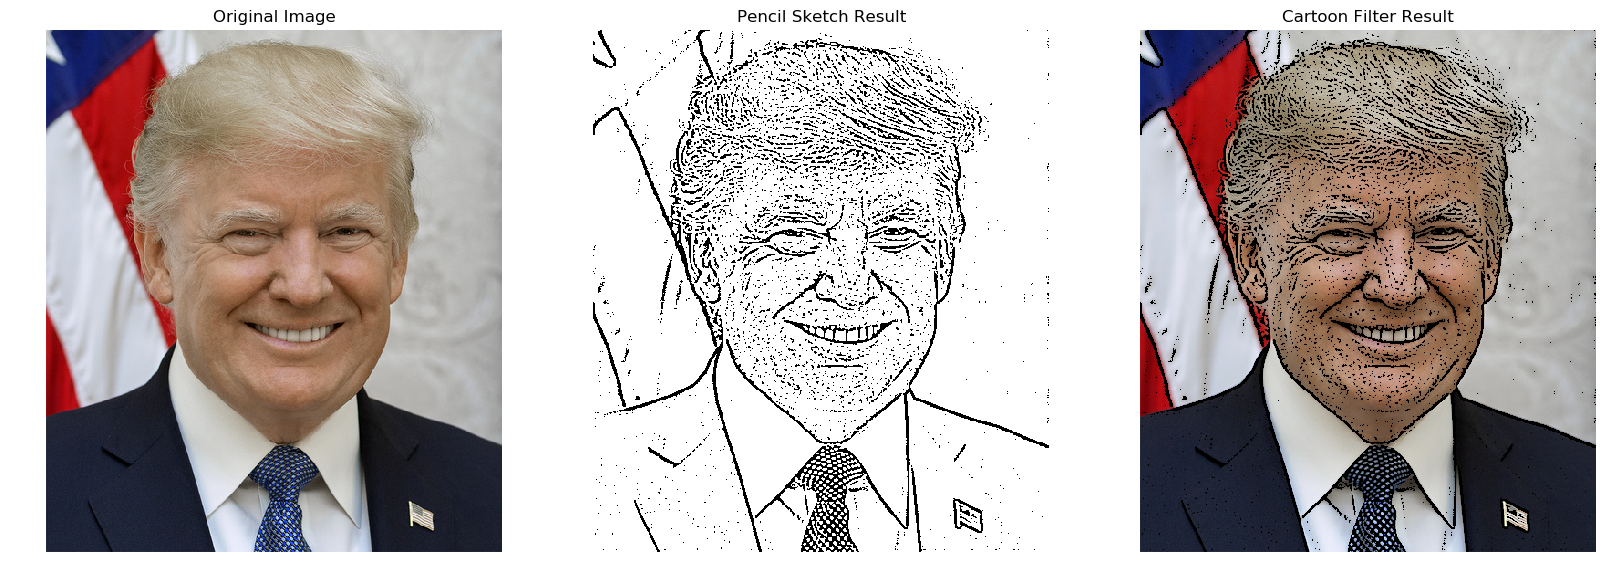

In [9]:
plt.figure(figsize=[20,10])
plt.subplot(131);plt.imshow(image[:,:,::-1]);plt.title('Original Image');plt.axis('off')
plt.subplot(132);plt.imshow(pencilSketchImage[:,:,::-1]);plt.title('Pencil Sketch Result'),plt.axis('off')
plt.subplot(133);plt.imshow(cartoonImage[:,:,::-1]);plt.title('Cartoon Filter Result'),plt.axis('off')